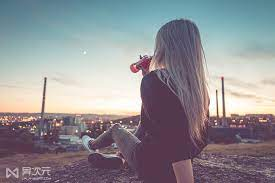

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [1]:
from PIL import Image
from torchvision import transforms

img = Image.open('test.jpeg')
display(img)
print(type(img))

In [2]:
img1 = transforms.ToTensor()(img)
print(type(img1))

<class 'torch.Tensor'>


In [3]:
img2 = transforms.ToPILImage()(img1)
print(type(img2))

<class 'PIL.Image.Image'>


## resize

/Users/blue/.pyenv/versions/3.9.5/lib/python3.9/site-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


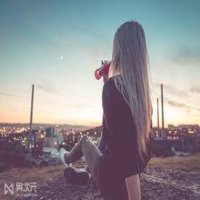

In [4]:
resize_img_oper = transforms.Resize((200, 200), interpolation=2)
resize_img = resize_img_oper(img)
display(resize_img)

## 裁剪

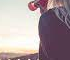

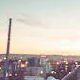

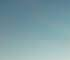

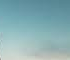

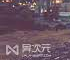

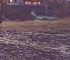

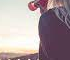

In [5]:
center_crop_oper = transforms.CenterCrop((60, 70))
random_crop_oper = transforms.RandomCrop((80, 80))
five_crop_oper = transforms.FiveCrop((60, 70))

img1 = center_crop_oper(img)
display(img1)

img2 = random_crop_oper(img)
display(img2)

img3 = five_crop_oper(img)
for i in img3:
    display(i)

## 翻转

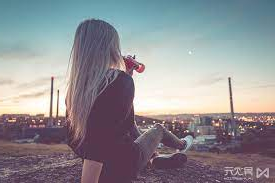

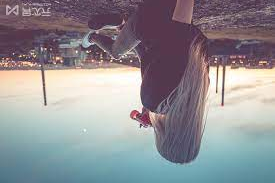

In [6]:
h_flip_oper = transforms.RandomHorizontalFlip(p=1)
v_flip_oper = transforms.RandomVerticalFlip(p=1)

img1 = h_flip_oper(img)
display(img1)

img2 = v_flip_oper(img)
display(img2)


## 标准化

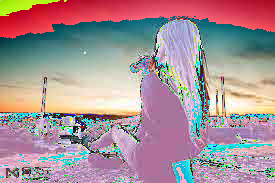

In [7]:
norm_oper = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

img_tensor = transforms.ToTensor()(img)

tensor_norm = norm_oper(img_tensor)

img_norm = transforms.ToPILImage()(tensor_norm)
display(img_norm)

## 变换的组合

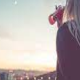

In [9]:
composed = transforms.Compose([transforms.Resize((200, 200)),
                              transforms.RandomCrop(80)])
img1 = composed(img)
display(img1)

## 读取数据的时候做数据变换

In [12]:
from torchvision import datasets

my_transform = transforms.Compose([transforms.ToTensor(),
                                   transforms.Normalize((0.5), (0.5))
                                  ])
mnist_dataset = datasets.MNIST(root='./data',
                               train=False,
                               transform=my_transform,
                               target_transform=None,
                               download=True)
item = mnist_dataset.__getitem__(0)
print(type(item[0]))

<class 'torch.Tensor'>
